# The Pendulum, Numerically

The equation of motion for the simple pendulum is 
$$
\ddot{\phi} = -\frac{g}{\ell} \sin \phi.
$$
This ODE is nonlinear and must be solved numerically.  Here's how we can do that using a simple scheme known as Euler's method.

First, turn your second order ODE into two first order ODEs by defining a new variable, $\omega$, such that
$$
\frac{d\phi}{dt} = \omega.
$$
Note that $\omega$ is the angular velocity of the pendulum.
Then the equation of motion reads
$$
\frac{d\omega}{dt} = -\frac{g}{\ell} \sin\phi.
$$
This gives us two coupled first order ODEs.

To solve them numerically, we approximate the deriviatives as finite differences, so that, e.g., $dt = \Delta t$ and $d\omega = \Delta \omega$.  If we have our initial conditions -- $\phi_0 \equiv \phi(0)$ and $\omega_0 \equiv \omega(0)$ -- we can build up our solution successively using the algorithm
$$
\phi_\text{n+1} = \phi_\text{n} + \Delta \phi  = \phi_\text{n} + \omega_n \Delta t
$$
$$
\omega_\text{n+1} = \omega_\text{n} + \Delta \omega = \omega_\text{n} + \left(  -\frac{g}{\ell} \sin\phi_\text{n} \right) \Delta t.
$$

Here's an implementation in Python.


## The Code

I'll annotate this code -- it's pretty simple, but it also uses some things you might not be familiar with.

First up, we'll use MatPlotLib to make our plots.  The inline code below makes the plots show up right below the code on this page.

We'll also make use of the NumPy library, which is great for dealing with arrays of numbers.

In [12]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

Next, we'll set some physical parameters -- I'll make the pendulum be one metre long.  I'll also set the initial time ($t=0$ s, of course) and how long we want to watch the pendulum for -- in this case, 20 s.  Finally, I'll set the timestep $\Delta t$ to be 0.0001.  This is a short enough time that the numerical integration should be accurate enough for us, but not too short that it will take forever to run.

In [13]:
g = 9.8 # m/s^2
l = 1.0 # m

t_start = 0.0 # times are in seconds
t_end = 20.0

dt = 0.0001 

Next we need an array to store our values for time $t$, angle $\phi$, and angular speed $\omega$.  NumPy is great for this, and the `arange` function will create an array and fill it with values for $t$ that start and end where we want, spaced by $\Delta t$.  The `zeros` function create empty arrays -- we'll have to fill in as we go for those ones.

While I'm creating arrays, I'll also specify my initial condition -- the state of the system at $t=0$.  In this case, I'll have the pendulum start at 45$^\circ$ and be released from rest, so that
$$
\phi_0 = \pi/4
$$
and
$$
\omega_0 = 0.
$$

In [14]:
t = np.arange(t_start, t_end, dt)
N = len(t)
phi = np.zeros(N)
omega = np.zeros(N)

# our initial conditions
phi[0] = np.pi/4.0
omega[0] = 0.0

Okay, now we can finally actually do the algorithm to evolve the system in time.  This loop is all there is to it -- we build our next part of the solution from the previous part.

In [15]:
for i in range(0, N-1):
    phi[i+1] = phi[i] + omega[i] * dt
    omega[i+1] = omega[i] + (-g/l * np.sin(phi[i])) * dt

Now let's see what our result looks like.  We have arrays for $t$, $\phi$, and $\omega$, so we can just plot $\phi(t)$:

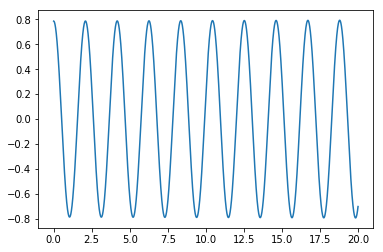

In [16]:
plt.plot(t, phi)
plt.show()

Looks good!  The motion is periodic, as expected.  We can look at $\omega(t)$, as well -- this is the angular velocity of the pendulum:

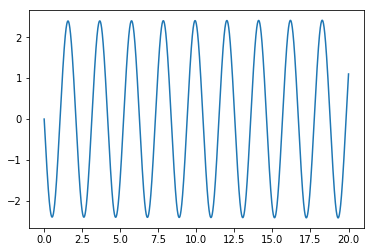

In [17]:
plt.plot(t, omega)
plt.show()

Alright, fun.  There are two more plots that I think are interesting.  One is called a "phase plot," which plots the angular velocity versus the angular position:

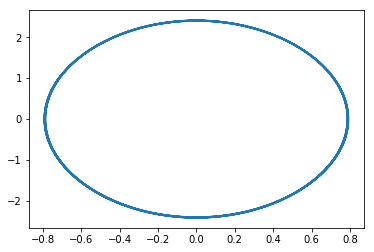

In [18]:
plt.plot(phi, omega)
plt.show()

In this system, the phase plot is a closed loop.

Finally, we can plot the actual *motion* of the pendulum bob by tracking its Cartesian coordinates:

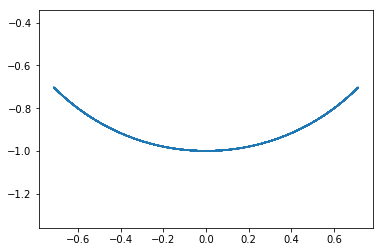

In [19]:
x = l * np.sin(phi)
y = -l * np.cos(phi)

plt.plot(x, y)
plt.axis('equal')
plt.show()

Looks okay to me.  

One last thing to note:  the plots above are not particularly good.  They don't have axis labels, and the numbers are a little small on the axes.  But you can look up how to make proper plots on your own.